## <center>Выявление жанра, характеристик и перспективности нового приложения в Google Play и Apple Store</center>

                                                                Проект выполнен: Резвухин Д.И., март 2022 г.

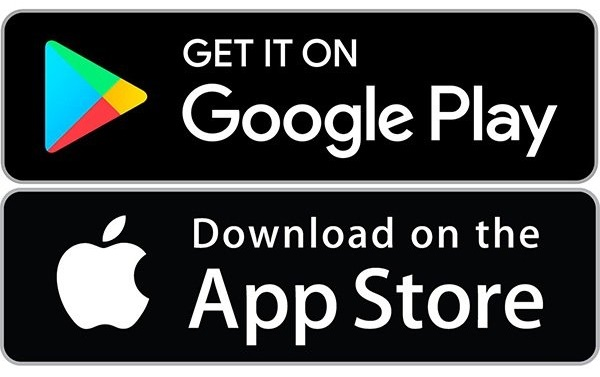

## Введение

В рамках реализации данного проекта мы представим, что работаем аналитиками данных в компании, которая создает мобильные приложения для Android и iOS. Приложения являются бесплатными в Google Play и Apple Store, поэтому наш основной источник дохода — реклама в приложениях. 

**Цель проекта** — используя анализ данных, помочь гипотетическим разработчикам понять, какие новые приложения могут привлечь значительное число пользователей и, таким образом, стать прибыльными. Иными словами, нужно выделить перспективную нишу среди всего разнообразия жанров приложений и выявить характеристики приложения, которые позволят ему стать популярным у пользователей.

Для выполнения цели нужно будет решить следующие **задачи**:

* Найти необходимые датасеты.
* Подготовить датасеты для последующего анализа (убрать дубликаты, отделить англоязычные приложения, отделить платные приложения от бесплатных).
* Выявить наиболее популярные категории приложений на платформах Google Play и Apple Store.
* Определить категорию потенциально прибыльных приложений на обеих платформах.
* Дать рекомендацию команде разработчиков, охарактеризовать профиль потенциально прибыльного ПО.

\* *Данный проект выполнен на стандартном Python без использования библиотек. Использованы функции, циклы, списки, словари.*

## 1. Исследование датасетов и предварительный анализ данных

По состоянию на сентябрь 2018 года в Apple Store было доступно около 2 миллионов приложений для iOS, а в Google Play — 2,1 миллиона приложений для Android.

Сбор данных для более чем четырех миллионов приложений требует значительных затрат времени и денег, поэтому вместо этого мы проанализируем выборку данных. Чтобы не тратить ресурсы на сбор новых данных, сначала попытаемся выяснить, можно ли бесплатно найти какие-либо актуальные датасеты. Для нашей цели подходят два набора данных (доступны на Kaggle):

[Датасет](https://www.kaggle.com/lava18/google-play-store-apps), содержащий данные примерно о десяти тысячах Android-приложений из Google Play. 

[Датасет](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps), содержащий данные примерно о семи тысячах приложений для iOS из App Store. 

Импортируем и посмотрим структуру обоих датасетов:

In [1]:
from csv import reader

### датасет Android ###
with open('googleplaystore.csv', encoding='utf-8') as opened_file_android:
    read_file_android = reader(opened_file_android)
    android = list(read_file_android)
    android_header = android[0] # отделяем заголовок
    android = android[1:]

### датасет iOS ###
with open('AppleStore.csv', encoding='utf-8') as opened_file_ios:
    read_file_ios = reader(opened_file_ios)
    ios = list(read_file_ios)
    ios_header = ios[0] # отделяем заголовок
    ios = ios[1:]

Чтобы упростить изучение двух датасетов, сначала напишем функцию `explore_data()`, которую в дальнейшем можно многократно использовать для исследования отдельных срезов датасетов в более удобном виде. Также добавим для функции `explore_data()` возможность показывать количество строк и столбцов для любого набора данных.

In [2]:
def explore_data(dataset, start, end, rows_and_columns=False):
    """Выводит определенные срезы датасета, также (опционально) возвращает количество рядов и столбцов"""   
    dataset_slice = dataset[start:end]
    
    for row in dataset_slice:
        print(row)
        print() 
 
    if rows_and_columns:
        print('Number of rows:', len(dataset))
        print('Number of columns:', len(dataset[0]))

Далее мы познакомимся с датасетом Google Play, узнаем названия столбцов и применим функцию `explore_data()`, чтобы посмотреть примеры строк (т.е. приложений), а также общее количество строк и столбцов.

In [3]:
print(android_header, end='\n\n')
explore_data(android, 0, 3, rows_and_columns=True)      

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']

['Coloring book moana', 'ART_AND_DESIGN', '3.9', '967', '14M', '500,000+', 'Free', '0', 'Everyone', 'Art & Design;Pretend Play', 'January 15, 2018', '2.0.0', '4.0.3 and up']

['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']

Number of rows: 10841
Number of columns: 13


Датасет Google Play состоит из 10841 приложения, характеристики которых приведены в 13 столбцах. На первый взгляд, столбцы, которые могут быть полезны для целей нашего анализа — это 'App', 'Category', 'Reviews', 'Installs', 'Type', 'Price', и 'Genres'.

Теперь посмотрим набор данных Apple Store.

In [4]:
print(ios_header, end='\n\n') 
explore_data(ios, 0, 3, rows_and_columns=True) 

['id', 'track_name', 'size_bytes', 'currency', 'price', 'rating_count_tot', 'rating_count_ver', 'user_rating', 'user_rating_ver', 'ver', 'cont_rating', 'prime_genre', 'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic']

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']

['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']

['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games', '38', '5', '18', '1']

Number of rows: 7197
Number of columns: 16


Датасет App Store состоит из 7197 приложений и 16 столбцов. Интересующие нас столбцы: 'track_name', 'currency', 'price', 'rating_count_tot', 'rating_count_ver' и 'prime_genre'. Не все имена столбцов в этом случае говорят сами за себя, но значение каждого столбца можно найти в [документации для этого датасета](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home).

## 2. Data Cleaning

### 2.1. Удаление некорректных данных


Для датасета Google Play на Kaggle есть специальный [форум для обсуждения](https://www.kaggle.com/lava18/google-play-store-apps/discussion), и можно заметить, что в [одной из веток](https://www.kaggle.com/lava18/google-play-store-apps/discussion/66015) описывается ошибка для строки №10472. Посмотрим эту строку и сравним ее содержание с заголовками столбцов, а также с каким-нибудь другим рядом, содержание которого является правильным.

In [5]:
print(len(android), end='\n\n')
print(android_header, end='\n\n')
print(android[10472], end='\n\n')
print(android[0], end='\n\n')

10841

['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

['Life Made WI-Fi Touchscreen Photo Frame', '1.9', '19', '3.0M', '1,000+', 'Free', '0', 'Everyone', '', 'February 11, 2018', '1.0.19', '4.0 and up']

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']



Строка №10472 соответствует приложению **Life Made WI-Fi Touchscreen Photo Frame** с рейтингом 19. Это явная ошибка, потому что максимальный рейтинг для приложения Google Play равен 5 (как упоминалось в обсуждении, это проблема вызвана пропуском значения в столбце 'Category'). Как следствие, мы просто удалим эту строку.

In [6]:
del android[10472] 
print(len(android))

10840


### 2.2. Удаление повторов

Анализируя датасет Google Play, можно убедиться, что некоторые приложения имеют дубликаты. Например, приложение Instagram встречается целых четыре раза.

In [7]:
for app in android:
    name = app[0]
    if name == 'Instagram':
        print(app)

['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577446', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66577313', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']
['Instagram', 'SOCIAL', '4.5', '66509917', 'Varies with device', '1,000,000,000+', 'Free', '0', 'Teen', 'Social', 'July 31, 2018', 'Varies with device', 'Varies with device']


В общей сложности, можно найти 1181 случай, когда приложение встречается больше одного раза:

In [8]:
duplicate_apps = []
unique_apps = []

for app in android:
    name = app[0]
    if name in unique_apps:
        duplicate_apps.append(name)
    else:
        unique_apps.append(name)
    
print('Number of duplicate apps:', len(duplicate_apps), end='\n')
print('Examples of duplicate apps:', duplicate_apps[:15])

Number of duplicate apps: 1181
Examples of duplicate apps: ['Quick PDF Scanner + OCR FREE', 'Box', 'Google My Business', 'ZOOM Cloud Meetings', 'join.me - Simple Meetings', 'Box', 'Zenefits', 'Google Ads', 'Google My Business', 'Slack', 'FreshBooks Classic', 'Insightly CRM', 'QuickBooks Accounting: Invoicing & Expenses', 'HipChat - Chat Built for Teams', 'Xero Accounting Software']


Очевидно, что для корректного анализа данных нужно удалить повторяющиеся записи и оставить только уникальную запись для каждого приложения. Например, можно случайным образом удалить повторяющиеся строки, но есть и лучший способ.

Если посмотреть внимательно на строки, которые выведены выше для приложения Instagram, можно заметить, что основное различие  заключается в четвертой ячейке каждой строки, что соответствует количеству отзывов. Тот факт, что эти числа разные, означает, что данные были собраны в разное время. Таким образом, мы не будем удалять строки случайным образом, а сохраним строки с наибольшим количеством отзывов.

Для реализации такой идеи создадим словарь, в котором каждый ключ представляет собой уникальное название приложения, а значение является наибольшим количеством отзывов для данного приложения. В дальнейшем мы будем использовать этот словарь, чтобы создать новый набор данных, в котором будет только одна запись для каждого приложения (с наибольшим количеством отзывов).

Посчитаем, сколько должно остаться строк после удаления копий.

In [9]:
print("Expected length: ", len(android) - 1181) 

Expected length:  9659


Далее создадим пустой словарь, куда будем добавлять пары "приложение: максимальное количество отзывов".  

In [10]:
reviews_max = {}             

for app in android:
    name = app[0]
    n_reviews = float(app[3])
    
    if name in reviews_max and reviews_max[name] < n_reviews:
        reviews_max[name] = n_reviews
    elif name not in reviews_max:
        reviews_max[name] = n_reviews
        
print(len(reviews_max))

9659


Теперь будем использовать полученный словарь для удаления дубликатов (прим. насколько же проще все это делать в `pandas`!, однако понимаешь это только после освоения `pandas`:)). 

Создадим два пустых списка. android_clean — это очищенная база данных без дубликатов. Далее последовательно итерируем датасет Google Play и для каждой итерации произведем два действия:

* Присвоим название приложения и количество отзывов переменным.
* Добавим текущий ряд (приложение) в список android_clean, а название приложения (name) в список already_added, если:
> * Количество отзывов на текущее приложение совпадает с количеством отзывов на это приложение в словаре reviews_max; 
> * Названия приложения еще нет в списке уже добавленных. Нам нужно добавить это дополнительное условие, чтобы учесть те случаи, когда наибольшее количество отзывов на приложение одинаково для нескольких повторяющихся записей (например, приложение Box имеет три записи, в каждом из которых количество отзывов одинаково). Если просто проверить условие reviews_max [name] == n_reviews, мы все равно получим повторяющиеся записи для некоторых приложений.

In [11]:
android_clean = [] 
already_added = []

for app in android: 
    name = app[0]
    n_reviews = float(app[3])  
    
    if n_reviews == reviews_max[name] and name not in already_added:
        android_clean.append(app)
        already_added.append(name)
        
print(len(android_clean))

9659


### 2.3. Удаление приложений, интерфейс которых не на английском языке

Если внимательно изучить датасеты, можно заметить, что названия некоторых приложений предполагают, что они не предназначены для англоязычной аудитории. Ниже можно увидеть по паре примеров из обоих датасетов.

In [12]:
print(ios[813][1])
print(ios[6731][1])

print(android_clean[4412][0])
print(android_clean[7940][0])

爱奇艺PPS -《欢乐颂2》电视剧热播
【脱出ゲーム】絶対に最後までプレイしないで 〜謎解き＆ブロックパズル〜
中国語 AQリスニング
لعبة تقدر تربح DZ


Мы не заинтересованы в использовании таких приложений для анализа, поэтому удалим их. Один из способов сделать это — удалить каждое приложение, название которого содержит символ, который обычно не используется в английском тексте. Английский текст обычно включает буквы английского алфавита, числа, состоящие из цифр от 0 до 9, знаки препинания (.,! ,?,; и т. д.) и другие символы (+, *, / и т. д.).

Все эти символы, характерные для англоязычных текстов, кодируются с использованием стандарта ASCII. Каждый символ ASCII имеет соответствующий номер от 0 до 127, и поэтому можно воспользоваться этим, чтобы создать функцию, которая проверяет имя приложения и сообщает, содержит ли оно символы, отличные от ASCII. 

Однако в некоторых названиях приложений на английском языке используются смайлики или другие символы (™, — (тире), - (дефис) и т. д.), выходящие за пределы диапазона ASCII. По этой причине мы удалим полезные приложения, если воспользуемся функцией в таком виде.

Чтобы минимизировать потерю данных, мы удалим приложение только в том случае, если его название содержит более трех символов, отличных от ASCII. Какие-то из англоязычных приложений с очень необычными названиями этот фильтр не пройдут, но их количество явно будет невелико и на результат анализа такая фильтрация не повлияет.

In [13]:
def check_english(string):  
    """Проверяет строку на наличие символов, обычно использующихся в английском языке.
       Значение True возвращается, если количество 'необычных' символов не превышает 3"""    
    non_english = 0  
    
    for character in string:
        if ord(character) > 127:
             non_english += 1
    return True if non_english <= 3 else False
            
print(check_english('Instagram'))
print(check_english('爱奇艺PPS -《欢乐颂2》电视剧热播'))
print(check_english('Docs To Go™ Free Office Suite'))
print(check_english('Instachat 😜'))

True
False
True
True


Ниже применим функцию к обоим датасетам, чтобы провести фильтрацию и отделить англоязычные приложения. Такие приложения добавим в новые инициализированные списки android_english и ios_english.

In [14]:
android_english = []
ios_english = []

for app in android_clean:
    name = app[0]
    if check_english(name):
        android_english.append(app)
        
for app in ios:
    name = app[1]
    if check_english(name):
        ios_english.append(app)        
        
explore_data(android_english, 0, 3, True)
print()
explore_data(ios_english, 0, 3, True)

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']

['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']

['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']

Number of rows: 9614
Number of columns: 13

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']

['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']

['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games

После данной процедуры осталось 9614 приложений Google Play и 6183 приложений App Store.

### 2.4. Оставляем только бесплатные приложения

Как упоминалось во введении, наши разработчики создают только те приложения, которые можно бесплатно загрузить и установить, и поэтому основной источник дохода нашей гипотетической компании — это реклама внутри приложений. Анализируемые датасеты содержат как бесплатные, так и платные приложения, и поэтому нужно отделить только бесплатные приложения для нашего анализа. 

In [15]:
android_final = []
ios_final = []

for app in android_english:
    price = app[7]
    if price == '0':
        android_final.append(app)
        
for app in ios_english:
    price = app[4]
    if price == '0.0':
        ios_final.append(app)   
        
explore_data(android_final, 0, 3, True)
print()
explore_data(ios_final, 0, 3, True)        

['Photo Editor & Candy Camera & Grid & ScrapBook', 'ART_AND_DESIGN', '4.1', '159', '19M', '10,000+', 'Free', '0', 'Everyone', 'Art & Design', 'January 7, 2018', '1.0.0', '4.0.3 and up']

['U Launcher Lite – FREE Live Cool Themes, Hide Apps', 'ART_AND_DESIGN', '4.7', '87510', '8.7M', '5,000,000+', 'Free', '0', 'Everyone', 'Art & Design', 'August 1, 2018', '1.2.4', '4.0.3 and up']

['Sketch - Draw & Paint', 'ART_AND_DESIGN', '4.5', '215644', '25M', '50,000,000+', 'Free', '0', 'Teen', 'Art & Design', 'June 8, 2018', 'Varies with device', '4.2 and up']

Number of rows: 8864
Number of columns: 13

['284882215', 'Facebook', '389879808', 'USD', '0.0', '2974676', '212', '3.5', '3.5', '95.0', '4+', 'Social Networking', '37', '1', '29', '1']

['389801252', 'Instagram', '113954816', 'USD', '0.0', '2161558', '1289', '4.5', '4.0', '10.23', '12+', 'Photo & Video', '37', '0', '29', '1']

['529479190', 'Clash of Clans', '116476928', 'USD', '0.0', '2130805', '579', '4.5', '4.5', '9.24.12', '9+', 'Games

В результате осталось 8864 приложения для Android и 3222 приложения для iOS. Этого должно хватить для анализа. 

## 3. Выявление наиболее популярных категорий приложений

### 3.1. Распространенность приложений по категориям

Как упоминалось во введении, цель проекта — определить виды приложений, которые могут привлечь больше пользователей, поскольку на наш доход сильно влияет количество юзеров приложения.

Чтобы свести к минимуму риски и расходы, стратегия проверки идеи приложения состоит из трех этапов:

1. Создать начальную версию приложения для Android и добавить ее в Google Play.
2. Если приложение получило хороший отклик от пользователей, доработать его.
3. Если приложение будет прибыльным через шесть месяцев, дополнительно создать версию для iOS и добавить ее в Apple Store.

Поскольку наша конечная задача — добавить приложение как в App Store, так и в Google Play, требуется определить тип приложений, которые станут успешными на обеих платформах. Например, это может быть приложение для повышения продуктивности, в котором используется геймификация.

Мы начнем анализ с определения наиболее популярных типов приложений для каждой платформы. Для этого построим таблицу частот для столбца "prime_genre" датасета Apple Store и столбцов "Genres" и "Category" датасета Google Play.

Для этого создадим две функции, которые можно использовать для анализа таблиц распределения по частоте. Первая функция будет показывать проценты в таблицах частот. Вторая функция включает в себя первую и может использоваться для отображения процентов в порядке убывания.

In [16]:
def freq_table(dataset, index):
    """Возвращает таблицу частот со значениями в процентах"""    
    frequency = {}
    total = 0
    
    for row in dataset:
        total += 1
        value = row[index]
        if value in frequency:
            frequency[value] += 1
        else:
            frequency[value] = 1
    
    table_percentages = {}
    
    for key in frequency:
        percentage = (frequency[key] / total) * 100
        table_percentages[key] = percentage 
    
    return table_percentages     


def display_table(dataset, index):
    """Сортирует таблицу частот по убыванию значений и выводит в удобном виде"""    
    table = freq_table(dataset, index)
    table_display = []
    
    for key in table:
        key_val_as_tuple = (table[key], key)
        table_display.append(key_val_as_tuple)

    table_sorted = sorted(table_display, reverse=True)
    
    for entry in table_sorted:
        print(f'{entry[1]}: {entry[0]:.2f}%')

Теперь, используя написанные функции, посмотрим количество приложений в Apple Store по категориям:

In [17]:
display_table(ios_final, 11)  # столбец "prime_genre"

Games: 58.16%
Entertainment: 7.88%
Photo & Video: 4.97%
Education: 3.66%
Social Networking: 3.29%
Shopping: 2.61%
Utilities: 2.51%
Sports: 2.14%
Music: 2.05%
Health & Fitness: 2.02%
Productivity: 1.74%
Lifestyle: 1.58%
News: 1.33%
Travel: 1.24%
Finance: 1.12%
Weather: 0.87%
Food & Drink: 0.81%
Reference: 0.56%
Business: 0.53%
Book: 0.43%
Navigation: 0.19%
Medical: 0.19%
Catalogs: 0.12%


Мы видим, что среди бесплатных англоязычных приложений более половины (58,16%) занимают игры. Развлекательные приложения составляют около 8%, за ними следуют приложения для обработки фото и видео, количество которых около 5%. Только 3,66% приложений предназначены для образования, за ними следуют приложения для социальных сетей, которые составляют 3,29% в этом наборе данных.

Общее впечатление таково, что на платформе Apple Store (по крайней мере, в той ее части, которая содержит бесплатные англоязычные приложения) преобладают приложения, предназначенные для отдыха (игры, развлечения, фото и видео, социальные сети, спорт, музыка и т. д.), в то время как приложения с более "практическими" (деловыми) целями (образование, покупки, коммунальные услуги, продуктивность, образ жизни и т.д.) встречаются реже. Однако тот факт, что приложения-игры являются самыми многочисленными, не обязательно означает, что у них также самое большое количество пользователей — спрос может не соответствовать предложению.

Теперь посмотрим процентное соотношения приложений в Google Play на основе столбца "Category":

In [18]:
display_table(android_final, 1)  # столбец "Category"

FAMILY: 18.91%
GAME: 9.72%
TOOLS: 8.46%
BUSINESS: 4.59%
LIFESTYLE: 3.90%
PRODUCTIVITY: 3.89%
FINANCE: 3.70%
MEDICAL: 3.53%
SPORTS: 3.40%
PERSONALIZATION: 3.32%
COMMUNICATION: 3.24%
HEALTH_AND_FITNESS: 3.08%
PHOTOGRAPHY: 2.94%
NEWS_AND_MAGAZINES: 2.80%
SOCIAL: 2.66%
TRAVEL_AND_LOCAL: 2.34%
SHOPPING: 2.25%
BOOKS_AND_REFERENCE: 2.14%
DATING: 1.86%
VIDEO_PLAYERS: 1.79%
MAPS_AND_NAVIGATION: 1.40%
FOOD_AND_DRINK: 1.24%
EDUCATION: 1.16%
ENTERTAINMENT: 0.96%
LIBRARIES_AND_DEMO: 0.94%
AUTO_AND_VEHICLES: 0.93%
HOUSE_AND_HOME: 0.82%
WEATHER: 0.80%
EVENTS: 0.71%
PARENTING: 0.65%
ART_AND_DESIGN: 0.64%
COMICS: 0.62%
BEAUTY: 0.60%


Таблица частот в Google Play существенно отличается от распределения в Apple Store. Здесь не так много приложений, предназначенных для развлечения. Напротив, множество приложений предназначено для практических целей (семья, инструменты, бизнес, образ жизни, продуктивность и т.д.). Однако, если мы исследуем результаты более подробно, то можно увидеть, что категория "Family" (на которую приходится почти 19% приложений) включает в основном игры для детей. Тем не менее, практические приложения явно лучше представлены в Google Play по сравнению с Apple Store.

Похожую ситуацию можно наблюдать, если вывести популярность приложений по столбцу "Genres":

In [19]:
display_table(android_final, -4)  # столбец "Genres"

Tools: 8.45%
Entertainment: 6.07%
Education: 5.35%
Business: 4.59%
Productivity: 3.89%
Lifestyle: 3.89%
Finance: 3.70%
Medical: 3.53%
Sports: 3.46%
Personalization: 3.32%
Communication: 3.24%
Action: 3.10%
Health & Fitness: 3.08%
Photography: 2.94%
News & Magazines: 2.80%
Social: 2.66%
Travel & Local: 2.32%
Shopping: 2.25%
Books & Reference: 2.14%
Simulation: 2.04%
Dating: 1.86%
Arcade: 1.85%
Video Players & Editors: 1.77%
Casual: 1.76%
Maps & Navigation: 1.40%
Food & Drink: 1.24%
Puzzle: 1.13%
Racing: 0.99%
Role Playing: 0.94%
Libraries & Demo: 0.94%
Auto & Vehicles: 0.93%
Strategy: 0.91%
House & Home: 0.82%
Weather: 0.80%
Events: 0.71%
Adventure: 0.68%
Comics: 0.61%
Beauty: 0.60%
Art & Design: 0.60%
Parenting: 0.50%
Card: 0.45%
Casino: 0.43%
Trivia: 0.42%
Educational;Education: 0.39%
Board: 0.38%
Educational: 0.37%
Education;Education: 0.34%
Word: 0.26%
Casual;Pretend Play: 0.24%
Music: 0.20%
Racing;Action & Adventure: 0.17%
Puzzle;Brain Games: 0.17%
Entertainment;Music & Video: 0.17

Таким образом, мы обнаружили, что в Apple Store преобладают приложения, предназначенные для развлечения, в то время как Google Play демонстрирует более сбалансированный набор как практических, так и развлекательных приложений. Теперь необходимо получить представление о том, какие приложения имеют наибольшее количество пользователей.

### 3.2. Самые популярные приложения по категориям в Apple Store

Один из способов узнать, какие категории приложений наиболее популярны (т.е. имеют наибольшее количество пользователей) — это рассчитать среднее количество установок для каждой категории (жанра) приложения. Для набора данных Google Play мы можем найти эту информацию в столбце "Installs", но для набора данных Apple Store эта информация отсутствует. В качестве обходного пути мы возьмем общее количество оценок пользователей, которое можно найти в колонке "rating_count_tot".

Вычислим среднее количество пользовательских оценок для каждого жанра приложения в Apple Store:

In [20]:
frequency = freq_table(ios_final, 11)

for genre in frequency:
    total = 0
    len_genre = 0
    
    for app in ios_final:
        genre_app = app[11]
        
        if genre_app == genre:
            number_of_ratings = float(app[5])
            total += number_of_ratings 
            len_genre += 1
            
    avg_number_of_ratings = total / len_genre
    print(f'{genre}: {avg_number_of_ratings:.2f}')            

Social Networking: 71548.35
Photo & Video: 28441.54
Games: 22788.67
Music: 57326.53
Reference: 74942.11
Health & Fitness: 23298.02
Weather: 52279.89
Utilities: 18684.46
Travel: 28243.80
Shopping: 26919.69
News: 21248.02
Navigation: 86090.33
Lifestyle: 16485.76
Entertainment: 14029.83
Food & Drink: 33333.92
Sports: 23008.90
Book: 39758.50
Finance: 31467.94
Education: 7003.98
Productivity: 21028.41
Business: 7491.12
Catalogs: 4004.00
Medical: 612.00


В среднем у приложений в категории "Navigation" больше всего отзывов пользователей, но на этот показатель сильно влияют такие тяжеловесы, как Waze и Google Maps, у которых в сумме около полумиллиона отзывов пользователей.

In [21]:
for app in ios_final:
    if app[11] == 'Navigation':
        print(app[1], ':', app[5])  # название приложения и количество отзывов

Waze - GPS Navigation, Maps & Real-time Traffic : 345046
Google Maps - Navigation & Transit : 154911
Geocaching® : 12811
CoPilot GPS – Car Navigation & Offline Maps : 3582
ImmobilienScout24: Real Estate Search in Germany : 187
Railway Route Search : 5


То же самое справедливо и для приложений для социальных сетей, где на среднее число отзывов сильно влияют несколько гигантов, таких как Facebook, Pinterest, Skype и т.д. Это же относится к музыкальным приложениям, где несколько крупных игроков, таких как Pandora, Spotify и Shazam, вносят очень большой вклад в среднее значение.

Наша цель — найти популярные жанры, однако такие категории как GPS-приложения, социальные сети или музыка могут показаться более популярными в плане востребованности, чем они есть на самом деле. По видимому, в таких категориях среднее количество оценок искажено несколькими крайне востребованными приложениями, которые имеют сотни тысяч отзывов, в то время как другие приложения едва преодолевают порог в десять тысяч. 

Посмотрим далее. Справочные приложения ("Reference") имеют в среднем 74 942 пользовательских отзыва, но Bible и Dictionary.com сильно влияют на средний рейтинг.

In [22]:
for app in ios_final:
    if app[-5] == 'Reference':
        print(app[1], ':', app[5])

Bible : 985920
Dictionary.com Dictionary & Thesaurus : 200047
Dictionary.com Dictionary & Thesaurus for iPad : 54175
Google Translate : 26786
Muslim Pro: Ramadan 2017 Prayer Times, Azan, Quran : 18418
New Furniture Mods - Pocket Wiki & Game Tools for Minecraft PC Edition : 17588
Merriam-Webster Dictionary : 16849
Night Sky : 12122
City Maps for Minecraft PE - The Best Maps for Minecraft Pocket Edition (MCPE) : 8535
LUCKY BLOCK MOD ™ for Minecraft PC Edition - The Best Pocket Wiki & Mods Installer Tools : 4693
GUNS MODS for Minecraft PC Edition - Mods Tools : 1497
Guides for Pokémon GO - Pokemon GO News and Cheats : 826
WWDC : 762
Horror Maps for Minecraft PE - Download The Scariest Maps for Minecraft Pocket Edition (MCPE) Free : 718
VPN Express : 14
Real Bike Traffic Rider Virtual Reality Glasses : 8
教えて!goo : 0
Jishokun-Japanese English Dictionary & Translator : 0


Однако у этой ниши, похоже, есть некоторый потенциал. Например, мы могли бы взять еще одну популярную книгу и превратить ее в приложение, в которое можно добавить различные функции, такие как ежедневные цитаты из книги, аудиоверсия, конкурсы на основе содержания книги и т.д. Кроме того, мы также могли бы встроить в такое приложение словарь, чтобы пользователям не приходилось смотреть значение какого-нибудь слова в другом приложении.

Эта идея хорошо сочетается с тем фактом, что в Apple Store преобладают развлекательные приложения. Эта платформа скорее всего перенасыщена приложениями для развлечения, а это означает, что у более "практичного" приложения может быть больше шансов выделиться среди огромного количества приложений в Apple Store.

Другие популярные жанры включают погоду, еду и напитки или финансы. Эти категории не кажутся актуальными по следующим причинам:

* Погодные приложения — люди обычно не проводят слишком много времени в таком ПО, и шансы получить прибыль от добавления в приложение рекламы невелики. Кроме того, для получения надежных данных о погоде в режиме реального времени может потребоваться подключение наших приложений к платным API.

* Еда и напитки — примеры здесь включают Starbucks, Dunkin 'Donuts, McDonald's и т.д. Очевидно, что для создания популярного приложения в такой категории требуется собственно кулинария и служба доставки, что выходит за рамки нашего проекта.

* Финансовые приложения — эти приложения включают банковское дело, оплату счетов, денежные переводы и т.д. Создание финансового приложения требует знания предметной области, а мы не хотим нанимать финансистов только для создания приложения.

Теперь давайте проанализируем платформу Google Play.

### 3.3. Самые популярные приложения по категориям в Google Play

Для рынка Google Play у нас есть данные о количестве установок, поэтому мы сможем получить более четкое представление о популярности жанров. К сожалению, можно увидеть, что большинство значений не ограничены сверху (100+, 1000+, 5000+ и т.д.):

In [23]:
display_table(android_final, 5)  # столбец Installs 

1,000,000+: 15.73%
100,000+: 11.55%
10,000,000+: 10.55%
10,000+: 10.20%
1,000+: 8.39%
100+: 6.92%
5,000,000+: 6.83%
500,000+: 5.56%
50,000+: 4.77%
5,000+: 4.51%
10+: 3.54%
500+: 3.25%
50,000,000+: 2.30%
100,000,000+: 2.13%
50+: 1.92%
5+: 0.79%
1+: 0.51%
500,000,000+: 0.27%
1,000,000,000+: 0.23%
0+: 0.05%
0: 0.01%


Сложность с этими данными заключается в том, что они неточны. Например, мы не знаем, имеет ли приложение с более чем 100 000 установок 100 000, 200 000 или 350 000 установок. С другой стороны, очень точные данные для наших целей и не нужны — мы просто хотим получить представление о том, какие жанры приложений привлекают больше всего пользователей.

Поэтому оставим цифры как есть. Будем считать, что приложение с более чем 100 000 установок имеет 100 000 установок, приложение с более чем 1 000 000 установок имеет 1 000 000 установок и т.д.

In [24]:
"""Для выполнения вычислений требуется преобразовать каждое число установок 
   в тип данных `float` (числа с плавающей запятой) 
   — это означает, что нужно удалить запятые и символы плюса, иначе преобразование вызовет ошибку. 
   Мы сделаем это непосредственно в цикле ниже, где также вычислим среднее количество установок для каждого жанра."""

categories_android = freq_table(android_final, 1)

for category in categories_android:
    total = 0
    len_category = 0
    
    for app in android_final:
        category_app = app[1]
        
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace(',', '')
            n_installs = n_installs.replace('+', '')
            total += float(n_installs)
            len_category += 1
    
    avg_n_installs = total / len_category
    print(f'{category}: {avg_n_installs:.0f}')

ART_AND_DESIGN: 1986335
AUTO_AND_VEHICLES: 647318
BEAUTY: 513152
BOOKS_AND_REFERENCE: 8767812
BUSINESS: 1712290
COMICS: 817657
COMMUNICATION: 38456119
DATING: 854029
EDUCATION: 1833495
ENTERTAINMENT: 11640706
EVENTS: 253542
FINANCE: 1387692
FOOD_AND_DRINK: 1924898
HEALTH_AND_FITNESS: 4188822
HOUSE_AND_HOME: 1331541
LIBRARIES_AND_DEMO: 638504
LIFESTYLE: 1437816
GAME: 15588016
FAMILY: 3695642
MEDICAL: 120551
SOCIAL: 23253652
SHOPPING: 7036877
PHOTOGRAPHY: 17840110
SPORTS: 3638640
TRAVEL_AND_LOCAL: 13984078
TOOLS: 10801391
PERSONALIZATION: 5201483
PRODUCTIVITY: 16787331
PARENTING: 542604
WEATHER: 5074486
VIDEO_PLAYERS: 24727872
NEWS_AND_MAGAZINES: 9549178
MAPS_AND_NAVIGATION: 4056942


В среднем наибольшее количество установок (38 456 119) имеют мессенджеры. На это число сильно влияют несколько приложений, у которых установок более одного миллиарда (WhatsApp, Facebook Messenger, Skype, Google Chrome, Gmail и Hangouts), и несколько других, которые имеют более 100 и 500 миллионов установок:

In [25]:
for app in android_final:
    if app[1] == 'COMMUNICATION' and app[5] in ('1,000,000,000+', '500,000,000+', '100,000,000+'):
        print(app[0], ':', app[5])

WhatsApp Messenger : 1,000,000,000+
imo beta free calls and text : 100,000,000+
Android Messages : 100,000,000+
Google Duo - High Quality Video Calls : 500,000,000+
Messenger – Text and Video Chat for Free : 1,000,000,000+
imo free video calls and chat : 500,000,000+
Skype - free IM & video calls : 1,000,000,000+
Who : 100,000,000+
GO SMS Pro - Messenger, Free Themes, Emoji : 100,000,000+
LINE: Free Calls & Messages : 500,000,000+
Google Chrome: Fast & Secure : 1,000,000,000+
Firefox Browser fast & private : 100,000,000+
UC Browser - Fast Download Private & Secure : 500,000,000+
Gmail : 1,000,000,000+
Hangouts : 1,000,000,000+
Messenger Lite: Free Calls & Messages : 100,000,000+
Kik : 100,000,000+
KakaoTalk: Free Calls & Text : 100,000,000+
Opera Mini - fast web browser : 100,000,000+
Opera Browser: Fast and Secure : 100,000,000+
Telegram : 100,000,000+
Truecaller: Caller ID, SMS spam blocking & Dialer : 100,000,000+
UC Browser Mini -Tiny Fast Private & Secure : 100,000,000+
Viber Mess

Если не брать в расчет мессенджеры, у которых более 100 миллионов установок, среднее значение уменьшится примерно в десять раз:

In [26]:
under_100_m = []

for app in android_final:
    n_installs = app[5]
    n_installs = n_installs.replace(',', '')
    n_installs = n_installs.replace('+', '')
    if (app[1] == 'COMMUNICATION') and (float(n_installs) < 100000000):
        under_100_m.append(float(n_installs))
        
print(round(sum(under_100_m) / len(under_100_m), 0))

3603485.0


Мы видим ту же картину для категории видеоплееров, которая занимает второе место с 24 727 872 установками. На рынке доминируют такие приложения, как Youtube, Google Play Movies & TV или MX Player. Ситуация похожа у социальных сетей (где у нас есть такие гиганты, как Facebook, Instagram, Google+ и т.д.), приложений для фотографий (Google Photo и другие популярные фоторедакторы) или приложений для повышения продуктивности (Microsoft Word, Dropbox, Google Calendar, Evernote и т.д.)

Опять же, основная проблема заключается в том, что эти жанры приложений могут показаться более популярными, чем они есть на самом деле. Более того, в этих нишах доминирует несколько гигантов, с которыми сложно конкурировать.

Жанр "игры" кажется довольно популярным, но ранее мы обнаружили, что эта часть рынка может быть перенасыщенной, поэтому нам нужно предложить другую рекомендацию приложения, если это возможно.

Жанр книг и справочников также выглядит довольно популярным: в среднем 8 767 811 установок. Интересно рассмотреть эту категорию более подробно, поскольку мы уже обнаружили, что этот жанр имеет некоторый потенциал в Apple Store, и наша цель — рекомендовать категорию приложения, которая демонстрирует рентабельность как в Apple Store, так и в Google Play.

Давайте посмотрим на некоторые приложения этого жанра и их количество установок:

In [27]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE':
        print(app[0], ':', app[5])

E-Book Read - Read Book for free : 50,000+
Download free book with green book : 100,000+
Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Free Panda Radio Music : 100,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
English Grammar Complete Handbook : 500,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
Google Play Books : 1,000,000,000+
AlReader -any text book reader : 5,000,000+
Offline English Dictionary : 100,000+
Offline: English to Tagalog Dictionary : 500,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
Recipes of Prophetic Medicine for free : 500,000+
ReadEra – free ebook reader : 1,000,000+
Anonymous caller detection : 10,000+
Ebook Reader : 5,000,000+
Litnet - E-books : 100,000+
Read books online : 5,000,000+
English to Urdu Dictionary : 500,000+
eBoox: book reader fb2 epub zip : 1,000,000+
English Persian Dictionary : 500,000+
Flybook : 500,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
E

Жанр книг и справочников включает в себя множество приложений: программное обеспечение для обработки и чтения электронных книг, различные коллекции книг, словари, учебные пособия по программированию или языкам и т.д. По всей видимости, и тут существует небольшое количество чрезвычайно популярных приложений, которые искажают среднее значение:

In [28]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and app[5] in ('1,000,000,000+', '500,000,000+', '100,000,000+'):
        print(app[0], ':', app[5])

Google Play Books : 1,000,000,000+
Bible : 100,000,000+
Amazon Kindle : 100,000,000+
Wattpad 📖 Free Books : 100,000,000+
Audiobooks from Audible : 100,000,000+


Однако таких сверхпопулярных приложений всего несколько, поэтому этот рынок все еще имеет потенциал. Давайте попробуем получить некоторые идеи, основанные на типах приложений, которые находятся где-то посередине по популярности (от 1000000 до 100000000 установок):

In [29]:
for app in android_final:
    if app[1] == 'BOOKS_AND_REFERENCE' and app[5] in ('1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+'):
        print(app[0], ':', app[5])

Wikipedia : 10,000,000+
Cool Reader : 10,000,000+
Book store : 1,000,000+
FBReader: Favorite Book Reader : 10,000,000+
Free Books - Spirit Fanfiction and Stories : 1,000,000+
AlReader -any text book reader : 5,000,000+
FamilySearch Tree : 1,000,000+
Cloud of Books : 1,000,000+
ReadEra – free ebook reader : 1,000,000+
Ebook Reader : 5,000,000+
Read books online : 5,000,000+
eBoox: book reader fb2 epub zip : 1,000,000+
All Maths Formulas : 1,000,000+
Ancestry : 5,000,000+
HTC Help : 10,000,000+
Moon+ Reader : 10,000,000+
English-Myanmar Dictionary : 1,000,000+
Golden Dictionary (EN-AR) : 1,000,000+
All Language Translator Free : 1,000,000+
Aldiko Book Reader : 10,000,000+
Dictionary - WordWeb : 5,000,000+
50000 Free eBooks & Free AudioBooks : 5,000,000+
Al-Quran (Free) : 10,000,000+
Al Quran Indonesia : 10,000,000+
Al'Quran Bahasa Indonesia : 10,000,000+
Al Quran Al karim : 1,000,000+
Al Quran : EAlim - Translations & MP3 Offline : 5,000,000+
Koran Read &MP3 30 Juz Offline : 1,000,000+
H

Похоже, что в этой нише преобладает программное обеспечение для обработки и чтения электронных книг, а также различные коллекции библиотек и словарей, поэтому, вероятно, создавать подобные приложения не рекомендуется, поскольку будет значительная конкуренция.

Можно также заметить, что существует довольно много приложений, созданных на основе Корана, что говорит о том, что создание приложения на основе популярной книги может быть прибыльным, причем как для Google Play, так и для Apple Store. Ранее в п.3.2 мы провели похожий анализ популярности приложений в Apple Store, и, по-видимому, там создание приложения по популярной книге также выглядит перспективной идеей. 

Таким образом, наша рекомендация для команды разработчиков будет заключаться в создании приложения на основе книги (или цикла произведений). Данная рекомендация основана на выводах, полученных в ходе проведенного анализа данных. Конкурирующих аналогов у такого приложения будет не так много, в то время как сам жанр книг и словарей не так пересыщен приложениями, как, например, игры на платформе Apple Store. Также отметим, что популярных книг достаточно много и каждая является уникальной; мы легко сможем подобрать такой вариант, который вообще не будет иметь аналогов и будет единственной опцией для поклонников этого произведения или серии книг.

## Заключение
В данном проекте мы проанализировали данные о мобильных приложениях Apple Store и Google Play с целью рекомендовать профиль приложения, который может быть прибыльным на обеих платформах.

Мы пришли к выводу, что создание приложения на основе популярной книги (возможно, какой-нибудь современной) или целой серии таких книг может быть выгодно как на платформе Google Play, так и для Apple Store. Однако на рынке уже полно различных библиотек, поэтому нам нужно добавить некоторые специальные функции, помимо оригинальной версии книги. Сюда могут входить ежедневные цитаты из книги, аудиоверсия, конкурсы по книге, форум, где юзеры могут обсудить прочитанное и т.д.

Из технических аспектов выполнения проекта хочется отметить, что манипуляции с датасетом, разведочный анализ и извлечение необходимых данных без библиотеки `pandas` весьма затруднительны по сравнению с имеющимся функционалом этой библиотеки. Плюсом такого подхода была "прокачка" навыков работы со списками, словарями и функциями.